<a href="https://colab.research.google.com/github/Colsai/DATA-601-Wan/blob/main/Project_1_presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chicago Public Schools: 
DATA601 | Wan  
How good? How unequal? What are the best and worst schools?  
An exploratory analysis of Chicago's Public School System.

In [ ]:
# Import Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Project Proposal:
Project Proposal for EDA: "Chicago Public Schools: College Scorecard"
Dataset is free, and publically acessible.

**Data Information:**  
I have chosen the dataset: https://data.cityofchicago.org/Education/Chicago-Public-Schools-School-Progress-Reports-SY1/dw27-rash

**Data Name:** "Chicago Public Schools - School Progress Reports SY1819"

| Information | Description |
|------|-------|
| Source | Provided by Chicago Public Schools  |
| Last Updated | November 7, 2019   |
| Size | 1.8mb  |
| Rows | 654 |
| Columns  | 182 |

Basic information on Chicago Public Schools at https://www.cps.edu/

### About the Dataset:  
The dataset I will focus on looks at the progress metrics of over 600 schools in the Chicago Public School system for the school year from *2018-2019*. This is a useful dataset because, although it is specific in scope (only focusing on the Chicago Public School system), it includes a larger list of many different metrics that are helpful for review. Larger national datasets often lack the number of metrics that this scorecard has, such as individual average scores for tests. When I had previously looked through Maryland's public data for schools, it was difficult to find reporting of NWEA and NAEP scores, for example.

Additionally, future comparisons to this data will be very important. Recent developments in the Chicago Public School system have included changes, such as reallocating funding away from ties to local police departments, as well as possible educational losses and issues caused by the Covid-19 pandemic.

### Background: 
In the words of Malcolm X, “Education is our passport to the future, for tomorrow belongs to the people who prepare for it today.” As a country, the United States places great importance on maintaining and improving its educational system. The National Center for Educational Statistics (NCES) reported that, in 2016, the United States spent 5th most per student in the world (1). However, our educational system has undergone a dramatic change since public schools have been forced to adopt alternative and hybrid models. The Chicago public school system has reopened after a year of at-home education.

Prior to this dramatic change, the Chicago Public School system has played a dramatic and vital community role for many families in Illinois. With a student body around 400,000, and employing over 21,000 teachers and 37,000 staff members, the Chicago Public Schools are very important role for the future (2). It is additionally a large cost burder on the taxpayer in the city of Chicago, with the upcoming school plan budgeting for over $8 billion in expenditures.

### Focus: 
My general question for focus is: "is education fair in the Chicago Public School system?". How much of a disparity do we see between the best and worst schools? Does every student have a chance at a decent education in Chicago?

I intend to look at performance metrics, such as graduation rate, NWEA test scores, PSAT/SAT scores, and attendance rates to look at disparities in educational attainment for students- is there a big difference between the best schools and the worst? What are some of the largest disparities in education? Do magnet schools have vastly better performance metrics than other schools?

https://nces.ed.gov/programs/coe/indicator_cmd.asp#:~:text=Norway%20reported%20the%20highest%20total,United%20States%20(6.0%20percent).
https://en.wikipedia.org/wiki/Chicago_Public_Schools

In [ ]:
#I'll call the dataset
df = pd.read_csv("https://data.cityofchicago.org/api/views/dw27-rash/rows.csv?accessType=DOWNLOAD&bom=true&format=true")

I'd like to explore few things:
- Graduation Rates
- Test and Proficiency Scores (SAT, etc.)
- Teacher Quality

## Project 2: Exploratory EDA
Visualizations, Data look, etc.

In [ ]:
#Custom display the elements
def show_all(input_list, line_len = 3):
    num_in_line = 0

    for elem in input_list:
        if num_in_line > line_len - 1:
            print(f"")
            print(elem, end = ', ')
            num_in_line = 0
        
        else:
            print(elem, end = ', ')
        
        num_in_line += 1

## I. Introducing the data:
Let's just look at the beginning, end, and sample of the data first.

In [ ]:
#Top of the data
df.head(5)

,School_ID,Short_Name,Long_Name,School_Type,Primary_Category,Address,City,State,Zip,Phone,Fax,CPS_School_Profile,Website,Progress_Report_Year,Blue_Ribbon_Award_Year,Excelerate_Award_Gold_Year,Spot_Light_Award_Year,Improvement_Award_Year,Excellence_Award_Year,Student_Growth_Rating,Student_Growth_Description,Growth_Reading_Grades_Tested_Pct_ES,Growth_Reading_Grades_Tested_Label_ES,Growth_Math_Grades_Tested_Pct_ES,Growth_Math_Grades_Tested_Label_ES,Student_Attainment_Rating,Student_Attainment_Description,Attainment_Reading_Pct_ES,Attainment_Reading_Lbl_ES,Attainment_Math_Pct_ES,Attainment_Math_Lbl_ES,Culture_Climate_Rating,Culture_Climate_Description,School_Survey_Student_Response_Rate_Pct,School_Survey_Student_Response_Rate_Avg_Pct,School_Survey_Teacher_Response_Rate_Pct,School_Survey_Teacher_Response_Rate_Avg_Pct,School_Survey_Parent_Response_Rate_Pct,School_Survey_Parent_Response_Rate_Avg_Pct,Healthy_School_Certification,...,College_Persistence_School_Pct_Year_2,College_Persistence_CPS_Pct_Year_2,College_Persistence_School_Pct_Year_1,College_Persistence_CPS_Pct_Year_1,Progress_Toward_Graduation_Year_1,Progress_Toward_Graduation_Year_2,State_School_Report_Card_URL,Mobility_Rate_Pct,Chronic_Truancy_Pct,Empty_Progress_Report_Message,School_Survey_Rating_Description,Supportive_School_Award,Supportive_School_Award_Desc,Parent_Survey_Results_Year,School_Latitude,School_Longitude,PSAT_Grade_9_Score_School_Avg,PSAT_Grade_10_Score_School_Avg,SAT_Grade_11_Score_School_Avg,SAT_Grade_11_Score_CPS_Avg,Growth_PSAT_Grade_9_School_Pct,Growth_PSAT_Grade_9_School_Lbl,Growth_PSAT_Reading_Grade_10_School_Pct,Growth_PSAT_Reading_Grade_10_School_Lbl,Growth_SAT_Grade_11_School_Pct,Growth_SAT_Grade_11_School_Lbl,Attainment_PSAT_Grade_9_School_Pct,Attainment_PSAT_Grade_9_School_Lbl,Attainment_PSAT_Grade_10_School_Pct,Attainment_PSAT_Grade_10_School_Lbl,Attainment_SAT_Grade_11_School_Pct,Attainment_SAT_Grade_11_School_Lbl,Attainment_All_Grades_School_Pct,Attainment_All_Grades_School_Lbl,Growth_PSAT_Math_Grade_10_School_Pct,Growth_PSAT_Math_Grade_10_School_Lbl,Growth_SAT_Reading_Grade_11_School_Pct,Growth_SAT_Reading_Grade_11_School_Lbl,Growth_SAT_Math_Grade_11_School_Pct,Growth_SAT_Math_Grade_11_School_Lbl
0,"609,710",HARLAN HS,John M Harlan Community Academy High School,Neighborhood,HS,9652 S MICHIGAN AVE,Chicago,Illinois,"60,628","7,735,355,400","7,735,355,061",http://cps.edu/Schools/Pages/school.aspx?Schoo...,https://www.harlanfalcons.org,"2,018",NaN,NaN,NaN,NaN,NaN,BELOW AVERAGE,Student Growth measures the change in standard...,NaN,NaN,NaN,NaN,FAR BELOW EXPECTATIONS,Student Attainment measures how well the schoo...,NaN,NaN,NaN,NaN,PARTIALLY ORGANIZED,Results are based on student and teacher respo...,76.6,81.4,80.0,79.9,41%,35.6,Not Achieved,...,45.5,72.3,56.9,71.9,"2,017","2,018",http://iirc.niu.edu/School.aspx?schoolid=15016...,33.9,89.4,NaN,This school is “Partially Organized for Improv...,EMERGING,This school has developed an action plan to su...,"2,018",41.718372,-87.620623,701,733,824,969.0,2.0,2nd,32.0,32nd,9.0,9th,8.3,8.3,4.8,4.8,5.6,5.6,6.2,6.2,7.0,7th,50.0,50th,50.0,50th
1,"610,059",MAYER,Oscar Mayer Magnet School,Magnet,ES,2250 N CLIFTON AVE,Chicago,Illinois,"60,614","7,735,345,535","7,735,345,777",http://cps.edu/Schools/Pages/school.aspx?Schoo...,http://mayermagnet.org/,"2,018",NaN,NaN,NaN,"2,013",NaN,AVERAGE,Student Growth measures the change in standard...,58.0,58th,47.0,47th,FAR ABOVE AVERAGE,Student Attainment measures how well the schoo...,96.0,96th,91.0,91st,WELL ORGANIZED,Results are based on student and teacher respo...,98.9,81.4,79.1,79.9,> 75%,35.6,Not Achieved,...,NaN,72.3,NaN,71.9,"2,017","2,018",http://iirc.niu.edu/School.aspx?schoolid=15016...,3.8,22.9,NaN,This school is “Well-Organized for Improvement...,EMERGING,This school has developed an action plan to su...,"2,018",41.923204,-87.657287,NaN,NaN,NaN,969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"610,334",RABY HS,Al Raby High Sch

In [ ]:
#End of the data
df.tail()

,School_ID,Short_Name,Long_Name,School_Type,Primary_Category,Address,City,State,Zip,Phone,Fax,CPS_School_Profile,Website,Progress_Report_Year,Blue_Ribbon_Award_Year,Excelerate_Award_Gold_Year,Spot_Light_Award_Year,Improvement_Award_Year,Excellence_Award_Year,Student_Growth_Rating,Student_Growth_Description,Growth_Reading_Grades_Tested_Pct_ES,Growth_Reading_Grades_Tested_Label_ES,Growth_Math_Grades_Tested_Pct_ES,Growth_Math_Grades_Tested_Label_ES,Student_Attainment_Rating,Student_Attainment_Description,Attainment_Reading_Pct_ES,Attainment_Reading_Lbl_ES,Attainment_Math_Pct_ES,Attainment_Math_Lbl_ES,Culture_Climate_Rating,Culture_Climate_Description,School_Survey_Student_Response_Rate_Pct,School_Survey_Student_Response_Rate_Avg_Pct,School_Survey_Teacher_Response_Rate_Pct,School_Survey_Teacher_Response_Rate_Avg_Pct,School_Survey_Parent_Response_Rate_Pct,School_Survey_Parent_Response_Rate_Avg_Pct,Healthy_School_Certification,...,College_Persistence_School_Pct_Year_2,College_Persistence_CPS_Pct_Year_2,College_Persistence_School_Pct_Year_1,College_Persistence_CPS_Pct_Year_1,Progress_Toward_Graduation_Year_1,Progress_Toward_Graduation_Year_2,State_School_Report_Card_URL,Mobility_Rate_Pct,Chronic_Truancy_Pct,Empty_Progress_Report_Message,School_Survey_Rating_Description,Supportive_School_Award,Supportive_School_Award_Desc,Parent_Survey_Results_Year,School_Latitude,School_Longitude,PSAT_Grade_9_Score_School_Avg,PSAT_Grade_10_Score_School_Avg,SAT_Grade_11_Score_School_Avg,SAT_Grade_11_Score_CPS_Avg,Growth_PSAT_Grade_9_School_Pct,Growth_PSAT_Grade_9_School_Lbl,Growth_PSAT_Reading_Grade_10_School_Pct,Growth_PSAT_Reading_Grade_10_School_Lbl,Growth_SAT_Grade_11_School_Pct,Growth_SAT_Grade_11_School_Lbl,Attainment_PSAT_Grade_9_School_Pct,Attainment_PSAT_Grade_9_School_Lbl,Attainment_PSAT_Grade_10_School_Pct,Attainment_PSAT_Grade_10_School_Lbl,Attainment_SAT_Grade_11_School_Pct,Attainment_SAT_Grade_11_School_Lbl,Attainment_All_Grades_School_Pct,Attainment_All_Grades_School_Lbl,Growth_PSAT_Math_Grade_10_School_Pct,Growth_PSAT_Math_Grade_10_School_Lbl,Growth_SAT_Reading_Grade_11_School_Pct,Growth_SAT_Reading_Grade_11_School_Lbl,Growth_SAT_Math_Grade_11_School_Pct,Growth_SAT_Math_Grade_11_School_Lbl
649,"610,125",RUIZ,Irma C Ruiz Elementary School,Neighborhood,ES,2410 S LEAVITT ST,Chicago,Illinois,"60,608","7,735,354,825","7,735,354,618",http://cps.edu/Schools/Pages/school.aspx?Schoo...,https://ruizelementaryschool.org,"2,018",NaN,2018.0,NaN,NaN,NaN,FAR ABOVE AVERAGE,Student Growth measures the change in standard...,91.0,91st,91.0,91st,AVERAGE,Student Attainment measures how well the schoo...,57.0,57th,56.0,56th,WELL ORGANIZED,Results are based on student and teacher respo...,97.9,81.4,87.7,79.9,< 30%,35.6,Not Achieved,...,NaN,72.3,NaN,71.9,"2,017","2,018",http://iirc.niu.edu/School.aspx?schoolid=15016...,8.1,7.8,NaN,This school is “Well-Organized for Improvement...,EMERGING,This school has developed an action plan to su...,"2,018",41.848101,-87.680745,NaN,NaN,NaN,969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
650,"610,219",WASHINGTON G ES,George Washington Elementary School,Neighborhood,ES,3611 E 114TH ST,Chicago,Illinois,"60,617","7,735,355,010","7,735,355,124",http://cps.edu/Schools/Pages/school.aspx?Schoo...,http://gwashington.cps.edu/,"2,018",NaN,2018.0,"2,012",NaN,NaN,AVERAGE,Student Growth measures the change in standard...,42.0,42nd,30.0,30th,AVERAGE,Student Attainment measures how well the schoo...,67.0,67th,63.0,63rd,WELL ORGANIZED,Results are based on student and teacher respo...,86.8,81.4,81.8,79.9,55%,35.6,Not Achieved,...,NaN,72.3,NaN,71.9,"2,017","2,018",http://iirc.niu.edu/School.aspx?schoolid=15016...,4.7,5.2,NaN,This school is “Well-Organized for Improvement...,EMERGING,This school has developed an action plan to su...,"2,018",41.688131,-87.536015,NaN,NaN,NaN,969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
651,"610,146",REVERE,Paul Revere Elementary Sc

In [ ]:
df.sample(3)

,School_ID,Short_Name,Long_Name,School_Type,Primary_Category,Address,City,State,Zip,Phone,Fax,CPS_School_Profile,Website,Progress_Report_Year,Blue_Ribbon_Award_Year,Excelerate_Award_Gold_Year,Spot_Light_Award_Year,Improvement_Award_Year,Excellence_Award_Year,Student_Growth_Rating,Student_Growth_Description,Growth_Reading_Grades_Tested_Pct_ES,Growth_Reading_Grades_Tested_Label_ES,Growth_Math_Grades_Tested_Pct_ES,Growth_Math_Grades_Tested_Label_ES,Student_Attainment_Rating,Student_Attainment_Description,Attainment_Reading_Pct_ES,Attainment_Reading_Lbl_ES,Attainment_Math_Pct_ES,Attainment_Math_Lbl_ES,Culture_Climate_Rating,Culture_Climate_Description,School_Survey_Student_Response_Rate_Pct,School_Survey_Student_Response_Rate_Avg_Pct,School_Survey_Teacher_Response_Rate_Pct,School_Survey_Teacher_Response_Rate_Avg_Pct,School_Survey_Parent_Response_Rate_Pct,School_Survey_Parent_Response_Rate_Avg_Pct,Healthy_School_Certification,...,College_Persistence_School_Pct_Year_2,College_Persistence_CPS_Pct_Year_2,College_Persistence_School_Pct_Year_1,College_Persistence_CPS_Pct_Year_1,Progress_Toward_Graduation_Year_1,Progress_Toward_Graduation_Year_2,State_School_Report_Card_URL,Mobility_Rate_Pct,Chronic_Truancy_Pct,Empty_Progress_Report_Message,School_Survey_Rating_Description,Supportive_School_Award,Supportive_School_Award_Desc,Parent_Survey_Results_Year,School_Latitude,School_Longitude,PSAT_Grade_9_Score_School_Avg,PSAT_Grade_10_Score_School_Avg,SAT_Grade_11_Score_School_Avg,SAT_Grade_11_Score_CPS_Avg,Growth_PSAT_Grade_9_School_Pct,Growth_PSAT_Grade_9_School_Lbl,Growth_PSAT_Reading_Grade_10_School_Pct,Growth_PSAT_Reading_Grade_10_School_Lbl,Growth_SAT_Grade_11_School_Pct,Growth_SAT_Grade_11_School_Lbl,Attainment_PSAT_Grade_9_School_Pct,Attainment_PSAT_Grade_9_School_Lbl,Attainment_PSAT_Grade_10_School_Pct,Attainment_PSAT_Grade_10_School_Lbl,Attainment_SAT_Grade_11_School_Pct,Attainment_SAT_Grade_11_School_Lbl,Attainment_All_Grades_School_Pct,Attainment_All_Grades_School_Lbl,Growth_PSAT_Math_Grade_10_School_Pct,Growth_PSAT_Math_Grade_10_School_Lbl,Growth_SAT_Reading_Grade_11_School_Pct,Growth_SAT_Reading_Grade_11_School_Lbl,Growth_SAT_Math_Grade_11_School_Pct,Growth_SAT_Math_Grade_11_School_Lbl
310,"609,774",ALCOTT ES,Louisa May Alcott College Preparatory ES,Neighborhood,ES,2625 N ORCHARD ST,Chicago,Illinois,"60,614","7,735,345,460","7,735,345,789",http://cps.edu/Schools/Pages/school.aspx?Schoo...,https://alcottelementary.net,"2,018",NaN,2018.0,NaN,NaN,2012.0,ABOVE AVERAGE,Student Growth measures the change in standard...,71.0,71st,86.0,86th,FAR ABOVE AVERAGE,Student Attainment measures how well the schoo...,97.0,97th,96.0,96th,ORGANIZED,Results are based on student and teacher respo...,96.3,81.4,58.5,79.9,42%,35.6,Not Achieved,...,NaN,72.3,NaN,71.9,"2,017","2,018",http://iirc.niu.edu/School.aspx?schoolid=15016...,6.2,11.3,NaN,This school is “Organized for Improvement” whi...,EMERGING,This school has developed an action plan to su...,"2,018",41.929850,-87.646413,NaN,NaN,NaN,969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,"609,797",BEIDLER,Jacob Beidler Elementary School,Neighborhood,ES,3151 W WALNUT ST,Chicago,Illinois,"60,612","7,735,346,811","7,735,346,817",http://cps.edu/Schools/Pages/school.aspx?Schoo...,https://www.beidlerschool.org/,"2,018",NaN,2018.0,NaN,NaN,NaN,ABOVE AVERAGE,Student Growth measures the change in standard...,82.0,82nd,78.0,78th,BELOW AVERAGE,Student Attainment measures how well the schoo...,23.0,23rd,24.0,24th,WELL ORGANIZED,Results are based on student and teacher respo...,99.9,81.4,83.3,79.9,< 30%,35.6,Not Achieved,...,NaN,72.3,NaN,71.9,"2,017","2,018",http://iirc.niu.edu/School.aspx?schoolid=15016...,14.1,37.2,NaN,This school is “Well-Organized for Improvement...,ESTABLISHED,This school has put in place systems and struc...,"2,018",41.885321,-87.705855,NaN,NaN,NaN,969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,"609,720",LANE TECH H

### What are all of the columns in that data?

In [ ]:
#What columns do we have?
show_all(df.columns,6)

School_ID, Short_Name, Long_Name, School_Type, Primary_Category, Address, 
City, State, Zip, Phone, Fax, CPS_School_Profile, 
Website, Progress_Report_Year, Blue_Ribbon_Award_Year, Excelerate_Award_Gold_Year, Spot_Light_Award_Year, Improvement_Award_Year, 
Excellence_Award_Year, Student_Growth_Rating, Student_Growth_Description, Growth_Reading_Grades_Tested_Pct_ES, Growth_Reading_Grades_Tested_Label_ES, Growth_Math_Grades_Tested_Pct_ES, 
Growth_Math_Grades_Tested_Label_ES, Student_Attainment_Rating, Student_Attainment_Description, Attainment_Reading_Pct_ES, Attainment_Reading_Lbl_ES, Attainment_Math_Pct_ES, 
Attainment_Math_Lbl_ES, Culture_Climate_Rating, Culture_Climate_Description, School_Survey_Student_Response_Rate_Pct, School_Survey_Student_Response_Rate_Avg_Pct, School_Survey_Teacher_Response_Rate_Pct, 
School_Survey_Teacher_Response_Rate_Avg_Pct, School_Survey_Parent_Response_Rate_Pct, School_Survey_Parent_Response_Rate_Avg_Pct, Healthy_School_Certification, Healthy_School_Certi

There are a lot of different metrics and data points in this data. There is a heavy emphasis on NWEA scores.

In [ ]:
nwea_columns = [x for x in df.columns if 'NWEA' in x]
show_all(nwea_columns, 5)

NWEA_Reading_Growth_Grade_3_Pct, NWEA_Reading_Growth_Grade_3_Lbl, NWEA_Reading_Growth_Grade_4_Pct, NWEA_Reading_Growth_Grade_4_Lbl, NWEA_Reading_Growth_Grade_5_Pct, 
NWEA_Reading_Growth_Grade_5_Lbl, NWEA_Reading_Growth_Grade_6_Pct, NWEA_Reading_Growth_Grade_6_Lbl, NWEA_Reading_Growth_Grade_7_Pct, NWEA_Reading_Growth_Grade_7_Lbl, 
NWEA_Reading_Growth_Grade_8_Pct, NWEA_Reading_Growth_Grade_8_Lbl, NWEA_Math_Growth_Grade_3_Pct, NWEA_Math_Growth_Grade_3_Lbl, NWEA_Math_Growth_Grade_4_Pct, 
NWEA_Math_Growth_Grade_4_Lbl, NWEA_Math_Growth_Grade_5_Pct, NWEA_Math_Growth_Grade_5_Lbl, NWEA_Math_Growth_Grade_6_Pct, NWEA_Math_Growth_Grade_6_Lbl, 
NWEA_Math_Growth_Grade_7_Pct, NWEA_Math_Growth_Grade_7_Lbl, NWEA_Math_Growth_Grade_8_Pct, NWEA_Math_Growth_Grade_8_Lbl, NWEA_Reading_Attainment_Grade_2_Pct, 
NWEA_Reading_Attainment_Grade_2_Lbl, NWEA_Reading_Attainment_Grade_3_Pct, NWEA_Reading_Attainment_Grade_3_Lbl, NWEA_Reading_Attainment_Grade_4_Pct, NWEA_Reading_Attainment_Grade_4_Lbl, 
NWEA_Reading_Att

In [ ]:
len(nwea_columns) / len(df.columns) #Almost 30% of the data is devoted to NWEA!

0.2857142857142857

In [ ]:
#And describing some of the data (what are some things we can look at?)
df.describe()

,Blue_Ribbon_Award_Year,Excelerate_Award_Gold_Year,Excellence_Award_Year,Growth_Reading_Grades_Tested_Pct_ES,Growth_Math_Grades_Tested_Pct_ES,Attainment_Reading_Pct_ES,Attainment_Math_Pct_ES,School_Survey_Student_Response_Rate_Pct,School_Survey_Student_Response_Rate_Avg_Pct,School_Survey_Teacher_Response_Rate_Pct,School_Survey_Teacher_Response_Rate_Avg_Pct,School_Survey_Parent_Response_Rate_Avg_Pct,NWEA_Reading_Growth_Grade_3_Pct,NWEA_Reading_Growth_Grade_4_Pct,NWEA_Reading_Growth_Grade_5_Pct,NWEA_Reading_Growth_Grade_6_Pct,NWEA_Reading_Growth_Grade_7_Pct,NWEA_Reading_Growth_Grade_8_Pct,NWEA_Math_Growth_Grade_3_Pct,NWEA_Math_Growth_Grade_4_Pct,NWEA_Math_Growth_Grade_5_Pct,NWEA_Math_Growth_Grade_6_Pct,NWEA_Math_Growth_Grade_7_Pct,NWEA_Math_Growth_Grade_8_Pct,NWEA_Reading_Attainment_Grade_2_Pct,NWEA_Reading_Attainment_Grade_3_Pct,NWEA_Reading_Attainment_Grade_4_Pct,NWEA_Reading_Attainment_Grade_5_Pct,NWEA_Reading_Attainment_Grade_6_Pct,NWEA_Reading_Attainment_Grade_7_Pct,NWEA_Reading_Attainment_Grade_8_Pct,NWEA_Math_Attainment_Grade_2_Pct,NWEA_Math_Attainment_Grade_3_Pct,NWEA_Math_Attainment_Grade_4_Pct,NWEA_Math_Attainment_Grade_5_Pct,NWEA_Math_Attainment_Grade_6_Pct,NWEA_Math_Attainment_Grade_7_Pct,NWEA_Math_Attainment_Grade_8_Pct,Suspensions_Per_100_Students_Year_1_Pct,Suspensions_Per_100_Students_Year_2_Pct,...,One_Year_Dropout_Rate_Avg_Pct,Freshmen_On_Track_School_Pct_Year_2,Freshmen_On_Track_CPS_Pct_Year_2,Freshmen_On_Track_School_Pct_Year_1,Freshmen_On_Track_CPS_Pct_Year_1,Graduation_4_Year_School_Pct_Year_2,Graduation_4_Year_CPS_Pct_Year_2,Graduation_4_Year_School_Pct_Year_1,Graduation_4_Year_CPS_Pct_Year_1,Graduation_5_Year_School_Pct_Year_2,Graduation_5_Year_CPS_Pct_Year_2,Graduation_5_Year_School_Pct_Year_1,Graduation_5_Year_CPS_Pct_Year_1,College_Enrollment_School_Pct_Year_2,College_Enrollment_CPS_Pct_Year_2,College_Enrollment_School_Pct_Year_1,College_Enrollment_CPS_Pct_Year_1,College_Persistence_School_Pct_Year_2,College_Persistence_CPS_Pct_Year_2,College_Persistence_School_Pct_Year_1,College_Persistence_CPS_Pct_Year_1,Mobility_Rate_Pct,Chronic_Truancy_Pct,School_Latitude,School_Longitude,SAT_Grade_11_Score_CPS_Avg,Growth_PSAT_Grade_9_School_Pct,Growth_PSAT_Reading_Grade_10_School_Pct,Growth_SAT_Grade_11_School_Pct,Attainment_PSAT_Grade_9_School_Pct,Attainment_PSAT_Grade_9_School_Lbl,Attainment_PSAT_Grade_10_School_Pct,Attainment_PSAT_Grade_10_School_Lbl,Attainment_SAT_Grade_11_School_Pct,Attainment_SAT_Grade_11_School_Lbl,Attainment_All_Grades_School_Pct,Attainment_All_Grades_School_Lbl,Growth_PSAT_Math_Grade_10_School_Pct,Growth_SAT_Reading_Grade_11_School_Pct,Growth_SAT_Math_Grade_11_School_Pct
count,18.000000,352.0,30.000000,488.000000,488.000000,490.000000,490.000000,644.000000,6.500000e+02,644.000000,6.500000e+02,6.510000e+02,454.000000,452.000000,455.000000,450.000000,448.000000,447.000000,452.000000,452.000000,455.000000,450.000000,448.000000,447.000000,451.000000,456.000000,454.000000,455.000000,450.00000,448.000000,447.000000,452.000000,456.000000,454.000000,455.000000,450.000000,448.000000,447.000000,518.000000,516.000000,...,6.500000e+02,135.000000,6.500000e+02,134.000000,6.500000e+02,142.000000,6.500000e+02,136.000000,6.500000e+02,136.000000,6.500000e+02,121.000000,650.0,165.000000,6.500000e+02,155.000000,6.500000e+02,132.000000,6.500000e+02,125.000000,6.500000e+02,636.000000,621.000000,654.000000,654.000000,650.0,133.000000,132.000000,127.000000,135.000000,135.000000,135.000000,135.000000,164.000000,164.000000,169.000000,169.000000,132.000000,135.000000,135.000000
mean,2012.500000,2018.0,2012.400000,59.266393,58.120902,55.812245,51.612245,79.968634,8.140000e+01,81.080280,7.990000e+01,3.560000e+01,55.610132,44.621681,48.228571,63.871111,64.863839,60.903803,60.896018,48.774336,45.775824,42.315556,68.196429,68.914989,47.046563,51.820175,51.096916,48.019780,55.32000,65.285714,71.604027,44.090708,51.307018,48.911894,45.690110,45.413333,55.848214,65.185682,6.188996,5.184302,...,6.400000e+00,87.458519,8.9400

It looks like test performance data could be helpful to look at SAT and College Persistence Scores here.

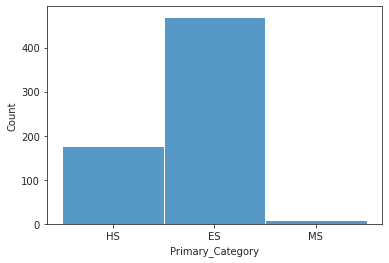

In [ ]:
#Let's graph a histplot of the schools, by type
sns.histplot(df, x = df['Primary_Category'])

In [ ]:
df['Primary_Category'].value_counts()

ES    470
HS    176
MS      8
Name: Primary_Category, dtype: int64

Most of the schools are either labeled as elementary or high schools.  
There are very few Middle Schools in the data (only 8).

In [ ]:
#How is Student Growth at the schools?
df['Student_Growth_Rating'].value_counts()

AVERAGE              268
ABOVE AVERAGE        189
BELOW AVERAGE         83
FAR ABOVE AVERAGE     57
NO DATA AVAILABLE     47
FAR BELOW AVERAGE      6
Name: Student_Growth_Rating, dtype: int64

In [ ]:
#How many of each type of school do we have?
df['Primary_Category'].value_counts()

ES    470
HS    176
MS      8
Name: Primary_Category, dtype: int64

## Let's focus solely on Chicago's High Schools Here.
- NWEA scores are helpful for looking at younger grades, but we will ignore them here.


I'll add a function here to look at the data

In [ ]:
#String matches what you are looking for
def category_find(dataframe, column, name, exact=True):
    if exact == True:
        find_it = dataframe[dataframe[column].str.match(name, case=False)] 

    else:
        find_it = dataframe[dataframe[column].str.contains(name, case=False)] 
    return find_it

In [ ]:
hs_df = category_find(df, 'Primary_Category', 'HS')

In [ ]:
#What does the data look like?
hs_df.head()

,School_ID,Short_Name,Long_Name,School_Type,Primary_Category,Address,City,State,Zip,Phone,Fax,CPS_School_Profile,Website,Progress_Report_Year,Blue_Ribbon_Award_Year,Excelerate_Award_Gold_Year,Spot_Light_Award_Year,Improvement_Award_Year,Excellence_Award_Year,Student_Growth_Rating,Student_Growth_Description,Growth_Reading_Grades_Tested_Pct_ES,Growth_Reading_Grades_Tested_Label_ES,Growth_Math_Grades_Tested_Pct_ES,Growth_Math_Grades_Tested_Label_ES,Student_Attainment_Rating,Student_Attainment_Description,Attainment_Reading_Pct_ES,Attainment_Reading_Lbl_ES,Attainment_Math_Pct_ES,Attainment_Math_Lbl_ES,Culture_Climate_Rating,Culture_Climate_Description,School_Survey_Student_Response_Rate_Pct,School_Survey_Student_Response_Rate_Avg_Pct,School_Survey_Teacher_Response_Rate_Pct,School_Survey_Teacher_Response_Rate_Avg_Pct,School_Survey_Parent_Response_Rate_Pct,School_Survey_Parent_Response_Rate_Avg_Pct,Healthy_School_Certification,...,College_Persistence_School_Pct_Year_2,College_Persistence_CPS_Pct_Year_2,College_Persistence_School_Pct_Year_1,College_Persistence_CPS_Pct_Year_1,Progress_Toward_Graduation_Year_1,Progress_Toward_Graduation_Year_2,State_School_Report_Card_URL,Mobility_Rate_Pct,Chronic_Truancy_Pct,Empty_Progress_Report_Message,School_Survey_Rating_Description,Supportive_School_Award,Supportive_School_Award_Desc,Parent_Survey_Results_Year,School_Latitude,School_Longitude,PSAT_Grade_9_Score_School_Avg,PSAT_Grade_10_Score_School_Avg,SAT_Grade_11_Score_School_Avg,SAT_Grade_11_Score_CPS_Avg,Growth_PSAT_Grade_9_School_Pct,Growth_PSAT_Grade_9_School_Lbl,Growth_PSAT_Reading_Grade_10_School_Pct,Growth_PSAT_Reading_Grade_10_School_Lbl,Growth_SAT_Grade_11_School_Pct,Growth_SAT_Grade_11_School_Lbl,Attainment_PSAT_Grade_9_School_Pct,Attainment_PSAT_Grade_9_School_Lbl,Attainment_PSAT_Grade_10_School_Pct,Attainment_PSAT_Grade_10_School_Lbl,Attainment_SAT_Grade_11_School_Pct,Attainment_SAT_Grade_11_School_Lbl,Attainment_All_Grades_School_Pct,Attainment_All_Grades_School_Lbl,Growth_PSAT_Math_Grade_10_School_Pct,Growth_PSAT_Math_Grade_10_School_Lbl,Growth_SAT_Reading_Grade_11_School_Pct,Growth_SAT_Reading_Grade_11_School_Lbl,Growth_SAT_Math_Grade_11_School_Pct,Growth_SAT_Math_Grade_11_School_Lbl
0,"609,710",HARLAN HS,John M Harlan Community Academy High School,Neighborhood,HS,9652 S MICHIGAN AVE,Chicago,Illinois,"60,628","7,735,355,400","7,735,355,061",http://cps.edu/Schools/Pages/school.aspx?Schoo...,https://www.harlanfalcons.org,"2,018",NaN,NaN,NaN,NaN,NaN,BELOW AVERAGE,Student Growth measures the change in standard...,NaN,NaN,NaN,NaN,FAR BELOW EXPECTATIONS,Student Attainment measures how well the schoo...,NaN,NaN,NaN,NaN,PARTIALLY ORGANIZED,Results are based on student and teacher respo...,76.6,81.4,80.0,79.9,41%,35.6,Not Achieved,...,45.5,72.3,56.9,71.9,"2,017","2,018",http://iirc.niu.edu/School.aspx?schoolid=15016...,33.9,89.4,NaN,This school is “Partially Organized for Improv...,EMERGING,This school has developed an action plan to su...,"2,018",41.718372,-87.620623,701,733,824,969.0,2.0,2nd,32.0,32nd,9.0,9th,8.3,8.3,4.8,4.8,5.6,5.6,6.2,6.2,7.0,7th,50.0,50th,50.0,50th
2,"610,334",RABY HS,Al Raby High School,Small,HS,3545 W FULTON BLVD,Chicago,Illinois,"60,624","7,735,346,755","7,735,346,938",http://cps.edu/Schools/Pages/school.aspx?Schoo...,http://www.alraby.org/,"2,018",NaN,NaN,NaN,NaN,NaN,BELOW AVERAGE,Student Growth measures the change in standard...,NaN,NaN,NaN,NaN,FAR BELOW EXPECTATIONS,Student Attainment measures how well the schoo...,NaN,NaN,NaN,NaN,WELL ORGANIZED,Results are based on student and teacher respo...,74.1,81.4,76.9,79.9,< 30%,35.6,Not Achieved,...,54.5,72.3,51.1,71.9,"2,017","2,018",http://iirc.niu.edu/School.aspx?schoolid=15016...,10.9,85.7,NaN,This school is “Well-Organized for Improvement...,ESTABLISHED,This school has put in place systems and struc...,"2,018",41.886210,-87.715423,685,756,814,969.0,1.0,1st,68.0,68th,3.0,3rd,4.8,4.8,0.0,0.0,3.5,3.5,2.7,2.7,16.0,16th,50.0,50th,63.0,63rd
9,"609,712",HIRSCH HS,Emil G 

### Let's show their locations by graphing them

In [ ]:
hs_df[['School_Latitude', 'School_Longitude']]

,School_Latitude,School_Longitude
0,41.718372,-87.620623
2,41.886210,-87.715423
9,41.753748,-87.601727
10,41.795201,-87.711059
17,41.894449,-87.726166
...,...,...
618,41.833507,-87.735299
621,41.876317,-87.674138
625,41.878444,-87.708050
628,41.712922,-87.592333


In [ ]:
lat_long = (hs_df.School_Longitude.min(), hs_df.School_Longitude.max(), hs_df.School_Latitude.min(), hs_df.School_Latitude.max())

In [ ]:
lat_long

(-87.806682, -87.53757, 41.656290000000006, 42.017171000000005)

In [ ]:
41.9653
-87.7738	←↕→	-87.5658
41.8096

In [240]:
base_map = '/content/drive/MyDrive/Location_map_Chicago.png'
type(base_map)

str

In [256]:
base_map = plt.imread('/content/drive/MyDrive/Location_map_Chicago.png', )

TypeError: ignored

In [254]:
hs_df['School_Latitude']

0      41.718372
2      41.886210
9      41.753748
10     41.795201
17     41.894449
         ...    
618    41.833507
621    41.876317
625    41.878444
628    41.712922
647    41.773962
Name: School_Latitude, Length: 176, dtype: float64

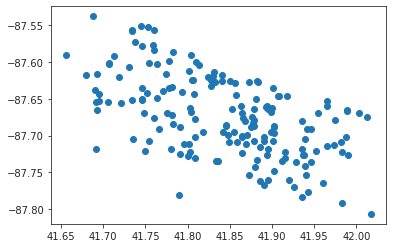

In [263]:
plt.scatter(data = hs_df, x = 'School_Latitude', y = 'School_Longitude')

Map image of all school locations in Chicago.  
Ref: https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db

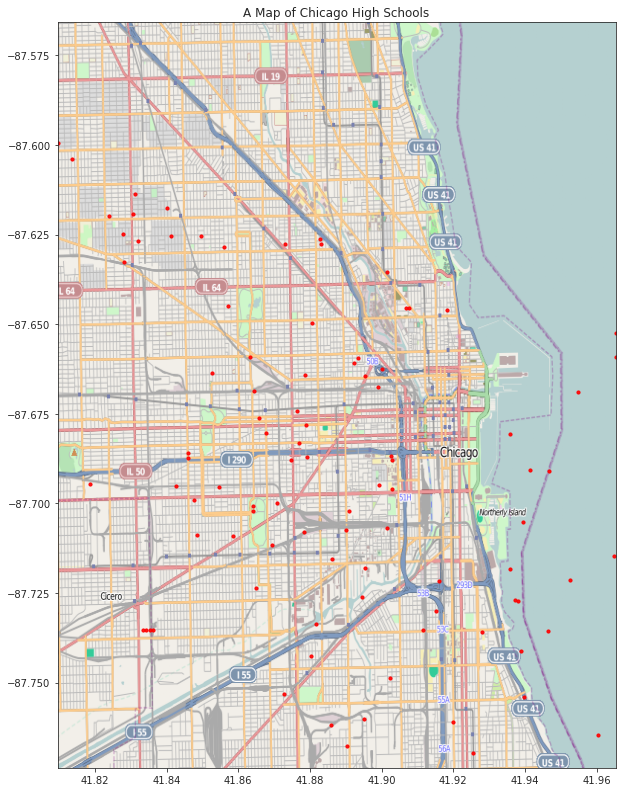

In [290]:
coordinates = (41.8096, 41.9653, -87.7738, -87.5658)

fig, ax = plt.subplots(figsize = (10,16))

ax.scatter(data = hs_df, x = 'School_Latitude', y = 'School_Longitude', zorder = 1, alpha= .9, c='red', s=10)

ax.set_title('A Map of Chicago High Schools')
ax.set_xlim(41.8096, 41.9653)
ax.set_ylim(-87.7738, -87.5658)

ax.imshow(base_map, zorder = 0, extent = coordinates, aspect = 'equal')

## School Types
What are the different types of schools the Chicago Public Schools has?

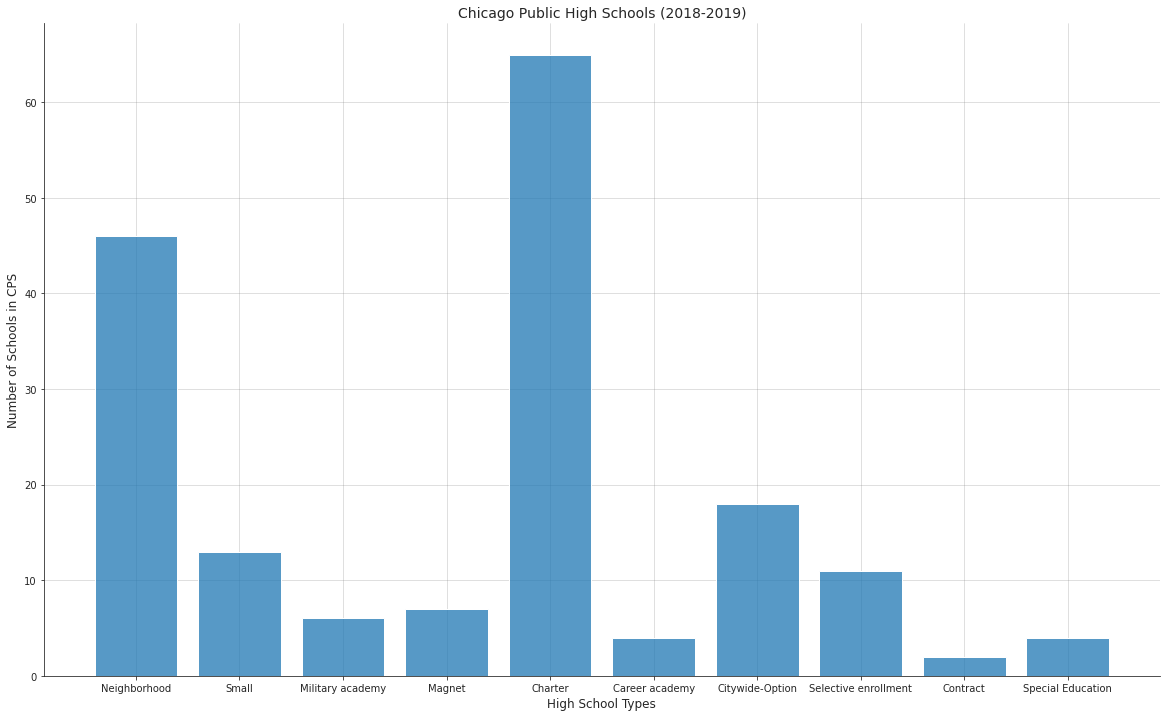

In [ ]:
#Histplot
fig, ax = plt.subplots(figsize=(20,12))

sns.histplot(data=hs_df, x='School_Type', shrink = .8)

#Labeling Graph
ax.set_title("Chicago Public High Schools (2018-2019)", size = 14)
ax.set_xlabel("High School Types", size = 12)
ax.set_ylabel("Number of Schools in CPS", size = 12)
ax.grid(color='gray', alpha = .5, linestyle='-', linewidth=.5)

sns.despine()
plt.show()

Interestingly, most of the high schools in Chicago are charter schools, with contract schools being the least frequent.

In [ ]:
#How many different columns does the data have
len(hs_df.columns)

182

Looking through the columns, there are several that we do not need. 
- The School Survey doesn't really tell us much (only whether they took it)
- NWEA scores are only from grades in Elementary School, so I'll remove them as well
- 'ES' stands for Elementary School, so this is not a helpful item to look at

In [ ]:
#Let's remove all NWEA elements
hs_new_columns = []
hs_removed = []

for element in hs_df.columns:
    if ("NWEA" in element) or ("School_Survey" in element) or ("ES" in element):
        hs_removed.append(element)
    else:
        hs_new_columns.append(element)

In [ ]:
len(hs_new_columns)

106

In [ ]:
#Are the new and old columns equal to the old columns?
len(hs_new_columns) + len(hs_removed) == len(hs_df.columns)

True

In [ ]:
show_all(hs_new_columns, 5)

School_ID, Short_Name, Long_Name, School_Type, Primary_Category, 
Address, City, State, Zip, Phone, 
Fax, CPS_School_Profile, Website, Progress_Report_Year, Blue_Ribbon_Award_Year, 
Excelerate_Award_Gold_Year, Spot_Light_Award_Year, Improvement_Award_Year, Excellence_Award_Year, Student_Growth_Rating, 
Student_Growth_Description, Student_Attainment_Rating, Student_Attainment_Description, Culture_Climate_Rating, Culture_Climate_Description, 
Healthy_School_Certification, Healthy_School_Certification_Description, Creative_School_Certification, Creative_School_Certification_Description, Suspensions_Per_100_Students_Year_1_Pct, 
Suspensions_Per_100_Students_Year_2_Pct, Suspensions_Per_100_Students_Avg_Pct, Misconducts_To_Suspensions_Year_1_Pct, Misconducts_To_Suspensions_Year_2_Pct, Misconducts_To_Suspensions_Avg_Pct, 
Average_Length_Suspension_Year_1_Pct, Average_Length_Suspension_Year_2_Pct, Average_Length_Suspension_Avg_Pct, Behavior_Discipline_Year_1, Behavior_Discipline_Year_2, 
Stude

Let's put hs_new_columns back into hs to create a new dataframe

In [ ]:
show_all(hs_new_columns, 4)

School_ID, Short_Name, Long_Name, School_Type, 
Primary_Category, Address, City, State, 
Zip, Phone, Fax, CPS_School_Profile, 
Website, Progress_Report_Year, Blue_Ribbon_Award_Year, Excelerate_Award_Gold_Year, 
Spot_Light_Award_Year, Improvement_Award_Year, Excellence_Award_Year, Student_Growth_Rating, 
Student_Growth_Description, Student_Attainment_Rating, Student_Attainment_Description, Culture_Climate_Rating, 
Culture_Climate_Description, Healthy_School_Certification, Healthy_School_Certification_Description, Creative_School_Certification, 
Creative_School_Certification_Description, Suspensions_Per_100_Students_Year_1_Pct, Suspensions_Per_100_Students_Year_2_Pct, Suspensions_Per_100_Students_Avg_Pct, 
Misconducts_To_Suspensions_Year_1_Pct, Misconducts_To_Suspensions_Year_2_Pct, Misconducts_To_Suspensions_Avg_Pct, Average_Length_Suspension_Year_1_Pct, 
Average_Length_Suspension_Year_2_Pct, Average_Length_Suspension_Avg_Pct, Behavior_Discipline_Year_1, Behavior_Discipline_Year_2, 
Stu

In [ ]:
#Checking what we removed
show_all(hs_removed, 4)

Growth_Reading_Grades_Tested_Pct_ES, Growth_Reading_Grades_Tested_Label_ES, Growth_Math_Grades_Tested_Pct_ES, Growth_Math_Grades_Tested_Label_ES, 
Attainment_Reading_Pct_ES, Attainment_Reading_Lbl_ES, Attainment_Math_Pct_ES, Attainment_Math_Lbl_ES, 
School_Survey_Student_Response_Rate_Pct, School_Survey_Student_Response_Rate_Avg_Pct, School_Survey_Teacher_Response_Rate_Pct, School_Survey_Teacher_Response_Rate_Avg_Pct, 
School_Survey_Parent_Response_Rate_Pct, School_Survey_Parent_Response_Rate_Avg_Pct, NWEA_Reading_Growth_Grade_3_Pct, NWEA_Reading_Growth_Grade_3_Lbl, 
NWEA_Reading_Growth_Grade_4_Pct, NWEA_Reading_Growth_Grade_4_Lbl, NWEA_Reading_Growth_Grade_5_Pct, NWEA_Reading_Growth_Grade_5_Lbl, 
NWEA_Reading_Growth_Grade_6_Pct, NWEA_Reading_Growth_Grade_6_Lbl, NWEA_Reading_Growth_Grade_7_Pct, NWEA_Reading_Growth_Grade_7_Lbl, 
NWEA_Reading_Growth_Grade_8_Pct, NWEA_Reading_Growth_Grade_8_Lbl, NWEA_Math_Growth_Grade_3_Pct, NWEA_Math_Growth_Grade_3_Lbl, 
NWEA_Math_Growth_Grade_4_Pct, NWE

In [ ]:
#Create a new data frame from usable columns
hs_performance = hs_df[hs_new_columns]

In [ ]:
show_all(hs_new_columns,4)

School_ID, Short_Name, Long_Name, School_Type, 
Primary_Category, Address, City, State, 
Zip, Phone, Fax, CPS_School_Profile, 
Website, Progress_Report_Year, Blue_Ribbon_Award_Year, Excelerate_Award_Gold_Year, 
Spot_Light_Award_Year, Improvement_Award_Year, Excellence_Award_Year, Student_Growth_Rating, 
Student_Growth_Description, Student_Attainment_Rating, Student_Attainment_Description, Culture_Climate_Rating, 
Culture_Climate_Description, Healthy_School_Certification, Healthy_School_Certification_Description, Creative_School_Certification, 
Creative_School_Certification_Description, Suspensions_Per_100_Students_Year_1_Pct, Suspensions_Per_100_Students_Year_2_Pct, Suspensions_Per_100_Students_Avg_Pct, 
Misconducts_To_Suspensions_Year_1_Pct, Misconducts_To_Suspensions_Year_2_Pct, Misconducts_To_Suspensions_Avg_Pct, Average_Length_Suspension_Year_1_Pct, 
Average_Length_Suspension_Year_2_Pct, Average_Length_Suspension_Avg_Pct, Behavior_Discipline_Year_1, Behavior_Discipline_Year_2, 
Stu

In [ ]:
#Let's just take a look at a few of the chronic truancy percent
negative_df = hs_df[["School_ID", 
                  "Short_Name", 
                  "Long_Name", 
                  "Student_Attendance_Year_1_Pct", 
                  "Suspensions_Per_100_Students_Avg_Pct", 
                  "Suspensions_Per_100_Students_Year_1_Pct", 
                  "Chronic_Truancy_Pct"
                  ]]
negative_df

,School_ID,Short_Name,Long_Name,Student_Attendance_Year_1_Pct,Suspensions_Per_100_Students_Avg_Pct,Suspensions_Per_100_Students_Year_1_Pct,Chronic_Truancy_Pct
0,"609,710",HARLAN HS,John M Harlan Community Academy High School,82.3,5.6,36.1,89.4
2,"610,334",RABY HS,Al Raby High School,85.2,5.6,50.3,85.7
9,"609,712",HIRSCH HS,Emil G Hirsch Metropolitan High School,80.2,5.6,23.0,100.8
10,"610,543",SOLORIO HS,Eric Solorio Academy High School,94.1,5.6,3.8,34.1
17,"610,389",ORR HS,Orr Academy High School,62.1,5.6,41.1,112.1
...,...,...,...,...,...,...,...
618,"610,383",SOCIAL JUSTICE HS,Greater Lawndale High School For Social Justice,89.4,5.6,9.3,50.5
621,"400,142",YCCS - VIRTUAL,YCCS-Virtual HS,NaN,5.6,NaN,NaN
625,"609,723",MARSHALL HS,John Marshall Metropolitan High School,79.0,5.6,67.7,120.3
628,"400,136",YCCS - OLIVE HARVEY,YCCS-Olive Harvey Middle College HS,69.3,5.6,NaN,166.8


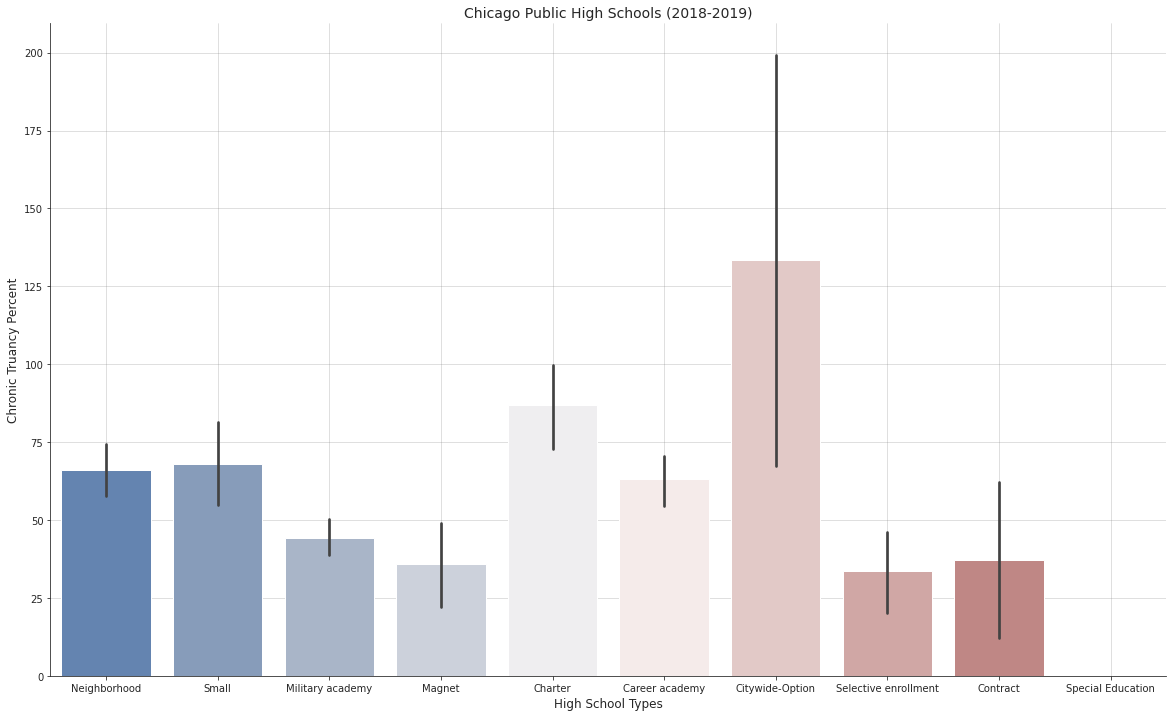

In [ ]:
#Histplot
fig, ax = plt.subplots(figsize=(20,12))

sns.barplot(data=hs_df, x='School_Type', y = 'Chronic_Truancy_Pct',  palette="vlag")

#Labeling Graph
ax.set_title("Chicago Public High Schools (2018-2019)", size = 14)
ax.set_xlabel("High School Types", size = 12)
ax.set_ylabel("Chronic Truancy Percent", size = 12)
ax.grid(color='gray', alpha = .5, linestyle='-', linewidth=.5)

sns.despine()
sns.set_style('ticks')
plt.show()

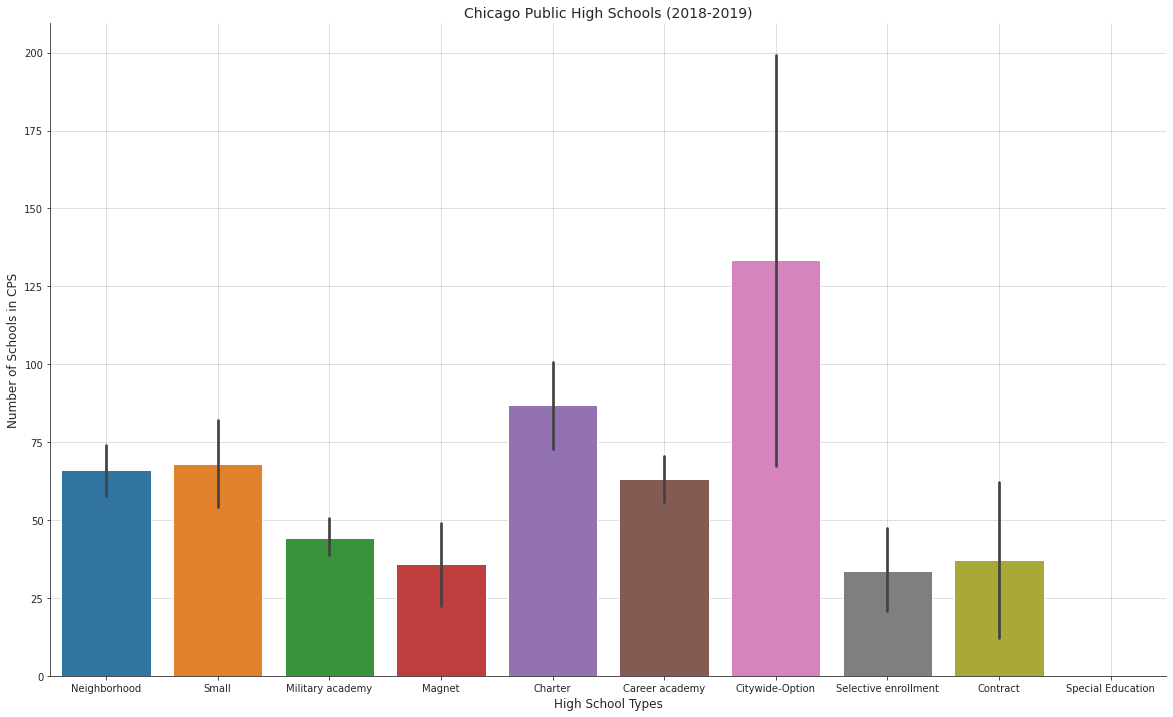

In [ ]:
#Let's choose some columns for
#Histplot
fig, ax = plt.subplots(figsize=(20,12))

sns.barplot(data=hs_df, x='School_Type', y = 'Chronic_Truancy_Pct')

#Labeling Graph
ax.set_title("Chicago Public High Schools (2018-2019)", size = 14)
ax.set_xlabel("High School Types", size = 12)
ax.set_ylabel("Number of Schools in CPS", size = 12)
ax.grid(color='gray', alpha = .5, linestyle='-', linewidth=.5)

sns.despine()
sns.set_style('ticks')
plt.show()

Text(0.5, 1.0, 'Teacher Attendance at different school types, CPS 2018-2019')

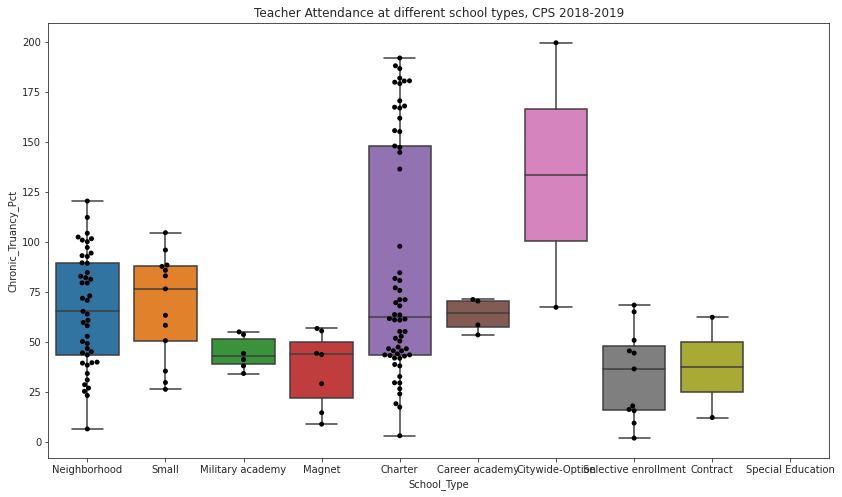

In [323]:
# Let's swarmplot and boxplot to see how well teacher attendance is, per High School
fig, ax = plt.subplots(figsize = (14,8))
sns.swarmplot(x = hs_df.School_Type, y = hs_df.Chronic_Truancy_Pct, color = 'black')
sns.boxplot(x = hs_df.School_Type, y = hs_df.Chronic_Truancy_Pct)

plt.title("Teacher Attendance at different school types, CPS 2018-2019")

In [ ]:
hs_perf_columns = hs_performance.columns

In [ ]:
for element in hs_df.columns:
    if ("NWEA" in element) or ("School_Survey" in element) or ("ES" in element):
        hs_removed.append(element)
    else:
        hs_new_columns.append(element)

In [ ]:
show_all(hs_perf_columns, 5)

School_ID, Short_Name, Long_Name, School_Type, Primary_Category, 
Address, City, State, Zip, Phone, 
Fax, CPS_School_Profile, Website, Progress_Report_Year, Blue_Ribbon_Award_Year, 
Excelerate_Award_Gold_Year, Spot_Light_Award_Year, Improvement_Award_Year, Excellence_Award_Year, Student_Growth_Rating, 
Student_Growth_Description, Student_Attainment_Rating, Student_Attainment_Description, Culture_Climate_Rating, Culture_Climate_Description, 
Healthy_School_Certification, Healthy_School_Certification_Description, Creative_School_Certification, Creative_School_Certification_Description, Suspensions_Per_100_Students_Year_1_Pct, 
Suspensions_Per_100_Students_Year_2_Pct, Suspensions_Per_100_Students_Avg_Pct, Misconducts_To_Suspensions_Year_1_Pct, Misconducts_To_Suspensions_Year_2_Pct, Misconducts_To_Suspensions_Avg_Pct, 
Average_Length_Suspension_Year_1_Pct, Average_Length_Suspension_Year_2_Pct, Average_Length_Suspension_Avg_Pct, Behavior_Discipline_Year_1, Behavior_Discipline_Year_2, 
Stude

# Let's focus on graduation rate, since this should be a good predictor for high schools.
- Take the HS dataframe, add the graduation information columns, and see what we see.

In [ ]:
hs_performance.columns[0:4].to_series

<bound method Index.to_series of Index(['School_ID', 'Short_Name', 'Long_Name', 'School_Type'], dtype='object')>

In [ ]:
grad_rate_columns = ['School_ID','Short_Name','Long_Name','School_Type']

for elem in hs_perf_columns:
    if "Graduation" in elem:
        grad_rate_columns.append(elem)

In [ ]:
hs_graduation = hs_performance[grad_rate_columns]

In [ ]:
hs_graduation.head()

,School_ID,Short_Name,Long_Name,School_Type,Graduation_4_Year_School_Pct_Year_2,Graduation_4_Year_CPS_Pct_Year_2,Graduation_4_Year_School_Pct_Year_1,Graduation_4_Year_CPS_Pct_Year_1,Graduation_5_Year_School_Pct_Year_2,Graduation_5_Year_CPS_Pct_Year_2,Graduation_5_Year_School_Pct_Year_1,Graduation_5_Year_CPS_Pct_Year_1,Progress_Toward_Graduation_Year_1,Progress_Toward_Graduation_Year_2
0,"609,710",HARLAN HS,John M Harlan Community Academy High School,Neighborhood,56.1,75.6,62.1,74.7,65.7,78.2,57.4,77.5,"2,017","2,018"
2,"610,334",RABY HS,Al Raby High School,Small,68.5,75.6,58.8,74.7,73.1,78.2,67.5,77.5,"2,017","2,018"
9,"609,712",HIRSCH HS,Emil G Hirsch Metropolitan High School,Neighborhood,55.0,75.6,44.2,74.7,45.5,78.2,40.0,77.5,"2,017","2,018"
10,"610,543",SOLORIO HS,Eric Solorio Academy High School,Neighborhood,84.4,75.6,89.2,74.7,91.2,78.2,82.7,77.5,"2,017","2,018"
17,"610,389",ORR HS,Orr Academy High School,Neighborhood,30.3,75.6,34.6,74.7,38.3,78.2,46.4,77.5,"2,017","2,018"


In [ ]:
hs_graduation.describe()

,Graduation_4_Year_School_Pct_Year_2,Graduation_4_Year_CPS_Pct_Year_2,Graduation_4_Year_School_Pct_Year_1,Graduation_4_Year_CPS_Pct_Year_1,Graduation_5_Year_School_Pct_Year_2,Graduation_5_Year_CPS_Pct_Year_2,Graduation_5_Year_School_Pct_Year_1,Graduation_5_Year_CPS_Pct_Year_1
count,140.000000,1.720000e+02,134.000000,1.720000e+02,134.000000,1.720000e+02,120.00000,172.0
mean,69.865714,7.560000e+01,69.191791,7.470000e+01,72.825373,7.820000e+01,74.96250,77.5
std,23.868060,2.280375e-13,23.090710,1.852805e-13,22.883319,2.137852e-13,19.00475,0.0
min,0.000000,7.560000e+01,0.000000,7.470000e+01,0.000000,7.820000e+01,0.00000,77.5
25%,63.300000,7.560000e+01,61.125000,7.470000e+01,65.900000,7.820000e+01,67.15000,77.5
50%,75.750000,7.560000e+01,75.600000,7.470000e+01,80.650000,7.820000e+01,79.20000,77.5
75%,85.425000,7.560000e+01,84.850000,7.470000e+01,86.825000,7.820000e+01,86.55000,77.5
max,98.800000,7.560000e+01,97.600000,7.470000e+01,98.300000,7.820000e+01,98.50000,77.5


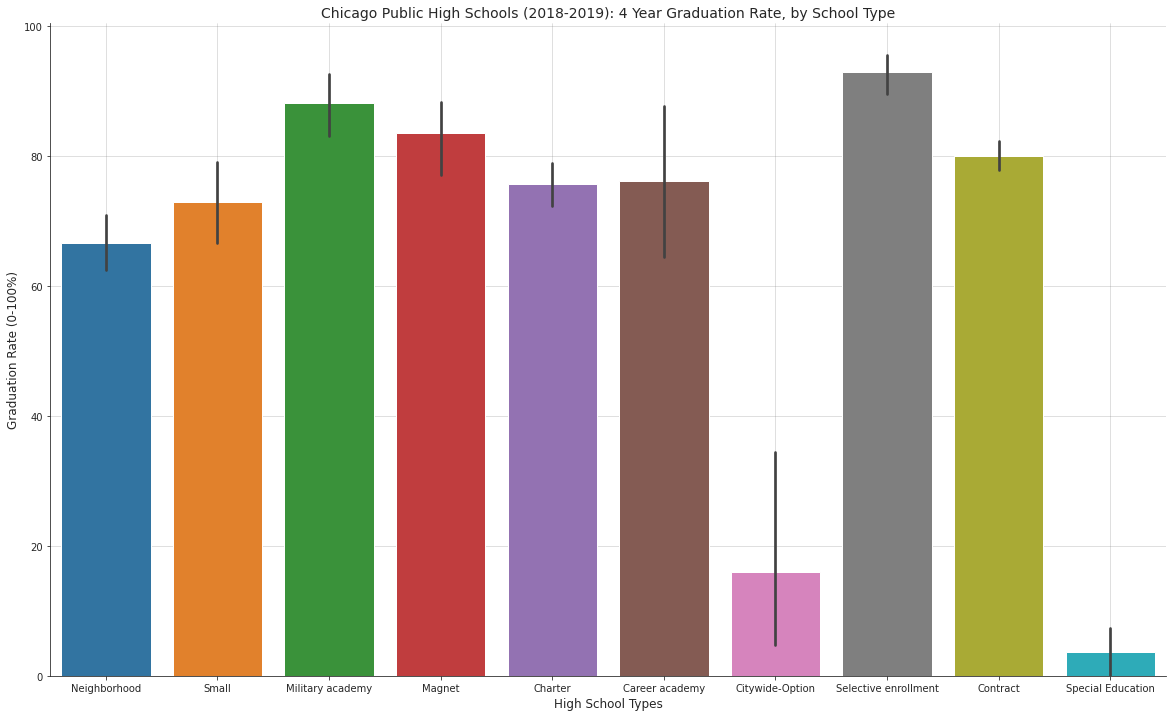

In [ ]:
#Let's choose some columns for
#Histplot
fig, ax = plt.subplots(figsize=(20,12))

sns.barplot(data=hs_df, x='School_Type', y = 'Graduation_4_Year_School_Pct_Year_1')

#Labeling Graph
ax.set_title("Chicago Public High Schools (2018-2019): 4 Year Graduation Rate, by School Type", size = 14)
ax.set_xlabel("High School Types", size = 12)
ax.set_ylabel("Graduation Rate (0-100%)", size = 12)
ax.grid(color='gray', alpha = .5, linestyle='-', linewidth=.5)

sns.despine()
sns.set_style('ticks')
plt.show()

In [ ]:
sns.scatterplot(data=hs_df, x='School_Name', y = 'Graduation_4_Year_School_Pct_Year_1')

ValueError: ignored

In [ ]:
sns.pairplot(hs_graduation)

## How about Teacher Quality?

In [ ]:
hs_perf_columns

In [ ]:
grad_rate_columns = ['School_ID','Short_Name','Long_Name','School_Type']

for element in hs_perf_columns:
    if "Teacher" in element:
        grad_rate_columns.append(elem)

### Teacher Quality

In [ ]:
grad_rate_columns

In [ ]:
teacher_quality = [x for x in hs_performance.columns if "teacher" in x.lower()]

In [296]:
grad_rate_columns = ['School_ID','Short_Name','Long_Name','School_Type']
teach_quality_df = hs_df[grad_rate_columns + teacher_quality]

In [297]:
teach_quality_df.describe()

,Teacher_Attendance_Year_1_Pct,Teacher_Attendance_Year_2_Pct,Teacher_Attendance_Avg_Pct
count,92.000000,92.000000,172.0
mean,94.586957,94.713043,95.0
std,1.170350,0.952754,0.0
min,90.100000,92.600000,95.0
25%,94.000000,94.000000,95.0
50%,94.700000,94.700000,95.0
75%,95.200000,95.400000,95.0
max,96.800000,96.900000,95.0


Text(0.5, 1.0, 'Teacher Attendance at different school types, CPS 2018-2019')

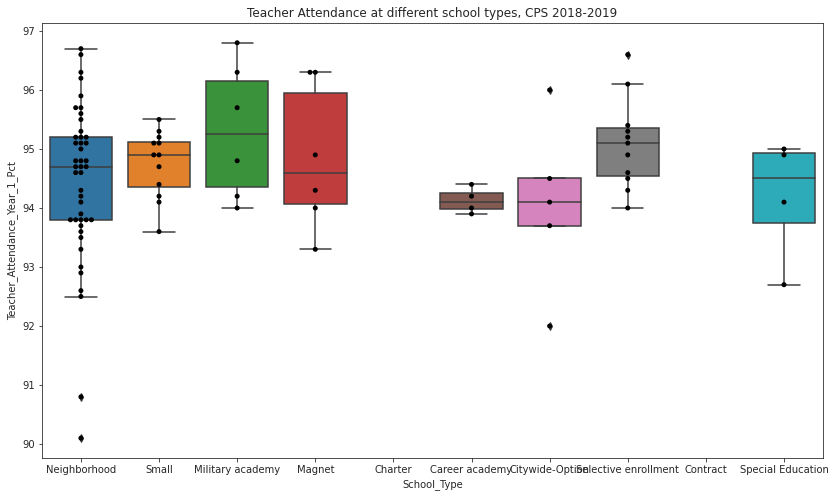

In [321]:
# Let's swarmplot and boxplot to see how well teacher attendance is, per High School
fig, ax = plt.subplots(figsize = (14,8))
sns.swarmplot(x = teach_quality_df.School_Type, y = teach_quality_df.Teacher_Attendance_Year_1_Pct, color = 'black')
sns.boxplot(x = teach_quality_df.School_Type, y = teach_quality_df.Teacher_Attendance_Year_1_Pct)

plt.title("Teacher Attendance at different school types, CPS 2018-2019")

As it stands, Military Academy Schools appear to be the best kind of school if you are expecting a teacher to be with a student on any given day. Neighborhood schools are well-represented, and have a large range. None of the schools for 2nd year teachers is less than ~90%.

A few outlier neighborhood schools appear to only have average teacher attendance around 90%.

Text(0.5, 1.0, 'Teacher Attendance at different school types, CPS 2018-2019')

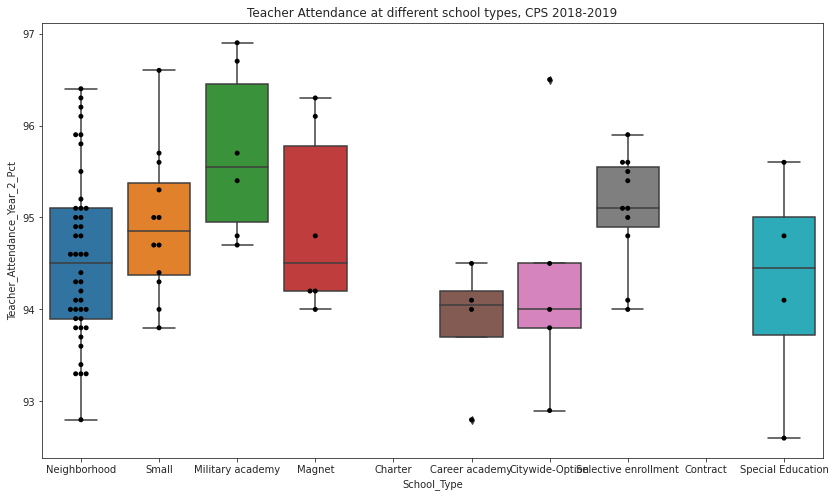

In [322]:
# Let's swarmplot and boxplot to see how well teacher attendance is, per High School
fig, ax = plt.subplots(figsize = (14,8))
sns.swarmplot(x = teach_quality_df.School_Type, y = teach_quality_df.Teacher_Attendance_Year_2_Pct, color = 'black')
sns.boxplot(x = teach_quality_df.School_Type, y = teach_quality_df.Teacher_Attendance_Year_2_Pct)

plt.title("Teacher Attendance at different school types, CPS 2018-2019")

It's a little concerning that Charter Schools do not have to report their data. It's difficult to know here how they would compare, and we don't really have a way of looking at what they have. 
  
As it stands, Military Academy Schools appear to be the best kind of school if you are expecting a teacher to be with a student on any given day. Neighborhood schools are well-represented, and have a large range. None of the schools for 2nd year teachers is less than ~92%.

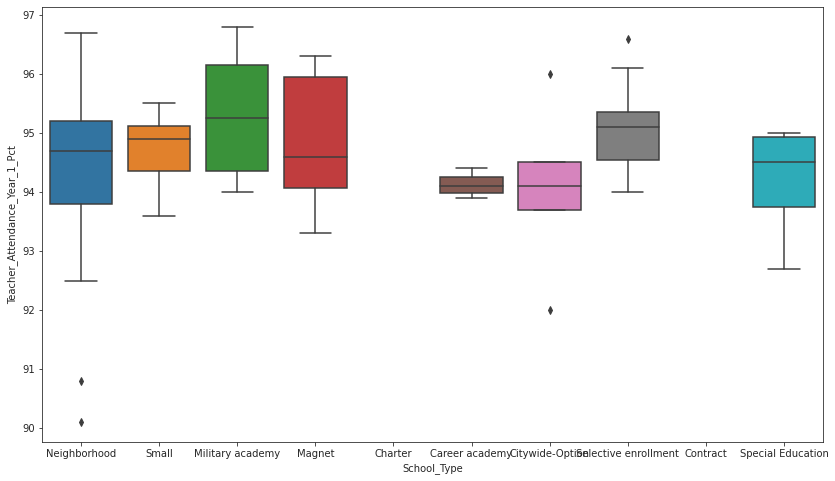

In [310]:
fig, ax = plt.subplots(figsize = (14,8))
sns.boxplot(x = teach_quality_df.School_Type, y = teach_quality_df.Teacher_Attendance_Year_1_Pct)

There isn't a huge difference between any of the school types, but 

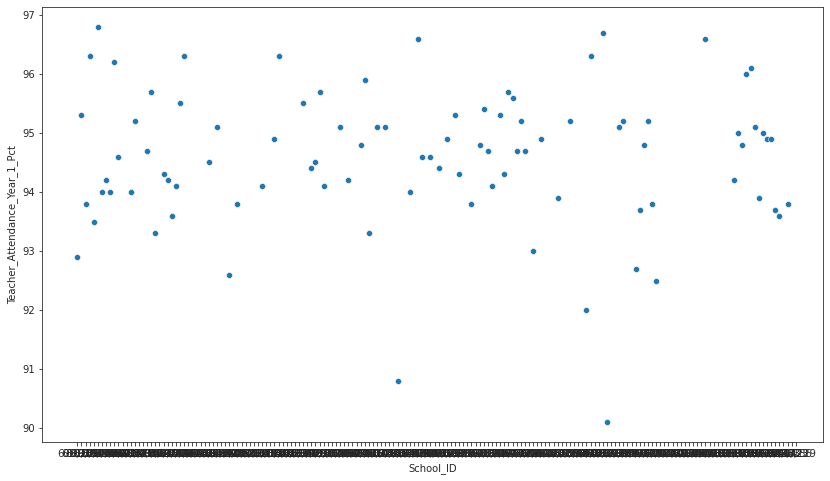

In [312]:
fig, ax = plt.subplots(figsize = (14,8))
sns.scatterplot(x = teach_quality_df.School_ID, y = teach_quality_df.Teacher_Attendance_Year_1_Pct)